In [21]:
!pip install dash plotly

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats
import dash
from dash import dcc, html, Input, Output


In [23]:
# Checking sheet availability
excel_file = "Confectionary [4564].xlsx"
sheets = pd.ExcelFile(excel_file).sheet_names
print("Sheets available:", sheets)


Sheets available: ['Sheet1']


In [24]:
df = pd.read_excel(excel_file, sheet_name=sheets[0])
print(df.head())


        Date Country(UK) Confectionary  Units Sold  Cost(£)  Profit(£)  \
0 2002-11-11     England       Biscuit      1118.0   2459.6     3130.4   
1 2002-07-05     England       Biscuit       708.0   1557.6     1982.4   
2 2001-10-31     England       Biscuit      1269.0   2791.8     3553.2   
3 2004-09-13     England       Biscuit      1631.0   3588.2     4566.8   
4 2004-03-10     England       Biscuit      2240.0   4928.0     6272.0   

   Revenue(£)  
0    749954.4  
1    300758.4  
2    966216.6  
3   1596096.6  
4   3010560.0  


In [25]:
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique(), "\n")


Unique values in Date:
<DatetimeArray>
['2002-11-11 00:00:00', '2002-07-05 00:00:00', '2001-10-31 00:00:00',
 '2004-09-13 00:00:00', '2004-03-10 00:00:00', '2004-05-29 00:00:00',
 '2000-10-30 00:00:00', '2005-04-30 00:00:00', '2002-03-09 00:00:00',
 '2000-08-05 00:00:00',
 ...
 '2000-02-17 00:00:00', '2002-08-16 00:00:00', '2004-03-27 00:00:00',
 '2004-03-28 00:00:00', '2002-07-23 00:00:00', '2001-12-02 00:00:00',
 '2002-01-23 00:00:00', '2001-09-12 00:00:00', '2004-02-28 00:00:00',
 '2000-07-24 00:00:00']
Length: 802, dtype: datetime64[ns] 

Unique values in Country(UK):
['England' 'Scotland' 'Wales' 'N. Ireland' 'Jersey'] 

Unique values in Confectionary:
['Biscuit' 'Biscuit Nut' 'Choclate Chunk' 'Caramel nut' 'Caramel' 'Plain'
 'Chocolate Chunk' 'Caramel Nut'] 

Unique values in Units Sold:
[1118.  708. 1269. 1631. 2240. 3521.  707. 2734. 1659.  888. 1619. 1445.
  743. 1295. 2852.  831. 2844. 1884. 1094.  819. 1937. 2689.  923. 1496.
 2300. 2001. 1817. 1326.  944. 2729.   nan 1582. 

Units Sold skewness: 0.5359013362801015


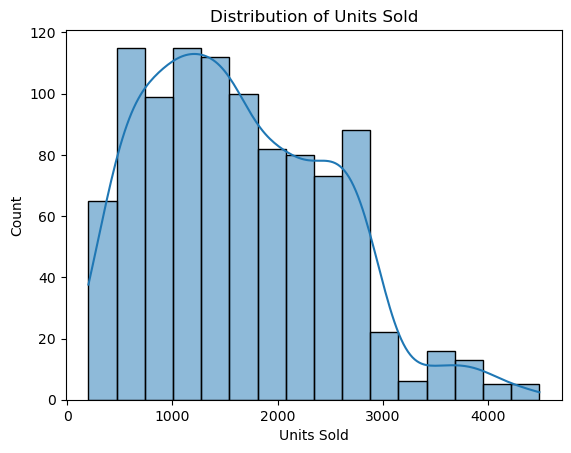

Cost(£) skewness: 1.010732601911684


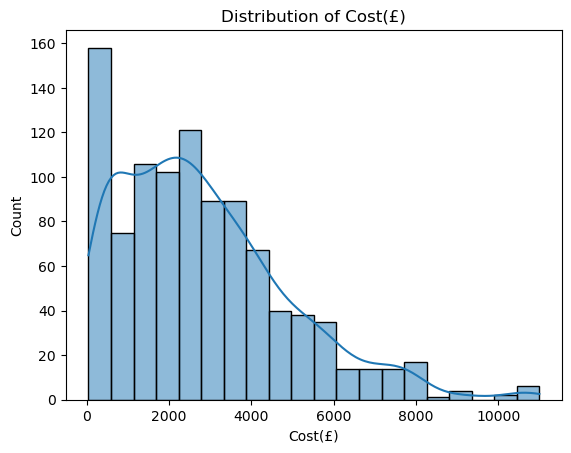

Profit(£) skewness: 0.937095119114028


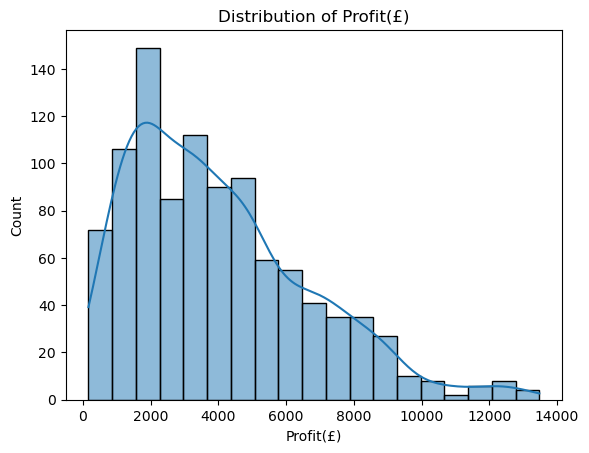

Revenue(£) skewness: 1.4610038729718267


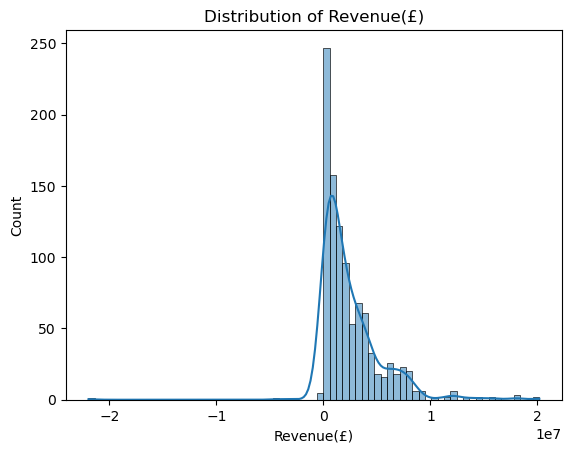

In [26]:
# 4. Distribution & Skewness
for col in ['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']:
    print(f"{col} skewness:", df[col].skew())
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



In [27]:

# 6. Total revenue by Country & Confectionary
revenue_summary = df.groupby(['Country(UK)', 'Confectionary'])['Revenue(£)'].sum().reset_index()
print(revenue_summary)

   Country(UK)    Confectionary    Revenue(£)
0      England          Biscuit  2.097131e+07
1      England      Biscuit Nut  4.963689e+07
2      England          Caramel  2.958311e+08
3      England      Caramel nut  3.635524e+07
4      England   Choclate Chunk  3.649195e+07
5       Jersey          Biscuit  7.687438e+07
6       Jersey      Biscuit Nut  9.668242e+07
7       Jersey          Caramel  2.901540e+08
8       Jersey      Caramel Nut  2.580430e+07
9       Jersey      Caramel nut  2.200929e+07
10      Jersey   Choclate Chunk  6.106360e+07
11      Jersey            Plain  6.350977e+07
12  N. Ireland          Biscuit  4.721579e+07
13  N. Ireland      Biscuit Nut  7.074984e+07
14  N. Ireland          Caramel  1.867898e+08
15  N. Ireland      Caramel Nut  1.698128e+07
16  N. Ireland      Caramel nut  1.698128e+07
17  N. Ireland   Choclate Chunk  4.237560e+07
18  N. Ireland            Plain  5.935430e+07
19    Scotland          Biscuit  7.051427e+07
20    Scotland      Biscuit Nut  1

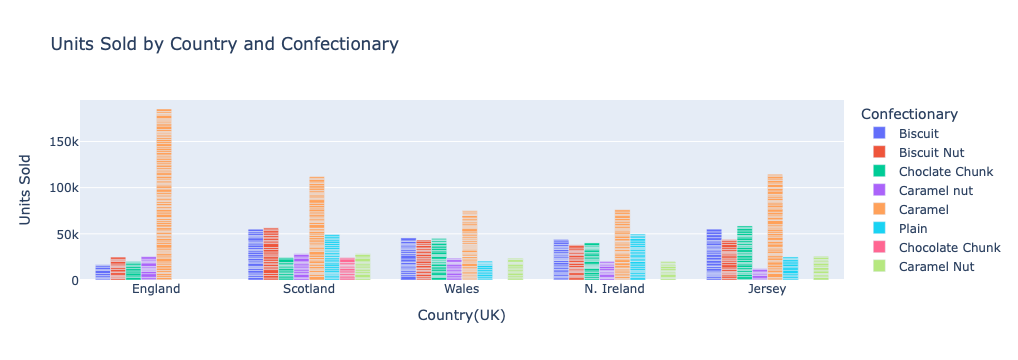

In [28]:
# 7. Grouped bar chart (Units Sold)
fig = px.bar(df, x="Country(UK)", y="Units Sold", color="Confectionary", barmode="group",
             title="Units Sold by Country and Confectionary")
fig.show()


In [29]:
# 8. Profit margin calculation
df["Profit Margin"] = df.apply(
    lambda row: row["Profit(£)"] / row["Revenue(£)"] if row["Revenue(£)"] > 0 else None,
    axis=1
)
margin_summary = df.groupby(['Country(UK)', 'Confectionary'])['Profit Margin'].mean().reset_index()
print(margin_summary)


   Country(UK)    Confectionary  Profit Margin
0      England          Biscuit       0.003709
1      England      Biscuit Nut       0.001724
2      England          Caramel       0.002990
3      England      Caramel nut       0.005676
4      England   Choclate Chunk       0.002010
5       Jersey          Biscuit       0.004168
6       Jersey      Biscuit Nut       0.002286
7       Jersey          Caramel       0.002395
8       Jersey      Caramel Nut       0.006108
9       Jersey      Caramel nut       0.006342
10      Jersey   Choclate Chunk       0.002789
11      Jersey            Plain       0.000935
12  N. Ireland          Biscuit       0.004230
13  N. Ireland      Biscuit Nut       0.002306
14  N. Ireland          Caramel       0.002624
15  N. Ireland      Caramel Nut       0.008728
16  N. Ireland      Caramel nut       0.008728
17  N. Ireland   Choclate Chunk       0.004060
18  N. Ireland            Plain       0.001074
19    Scotland          Biscuit       0.002633
20    Scotlan

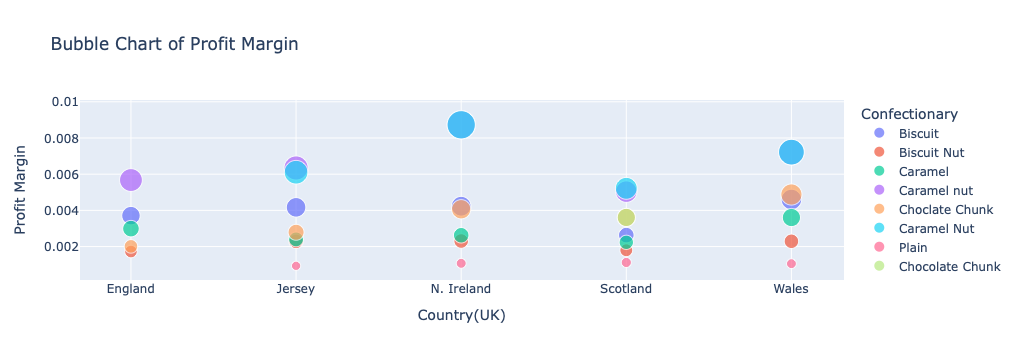

In [30]:

fig = px.scatter(
    margin_summary,
    x="Country(UK)",
    y="Profit Margin",
    size="Profit Margin",
    color="Confectionary",
    hover_name="Confectionary",
    title="Bubble Chart of Profit Margin"
)
fig.show()

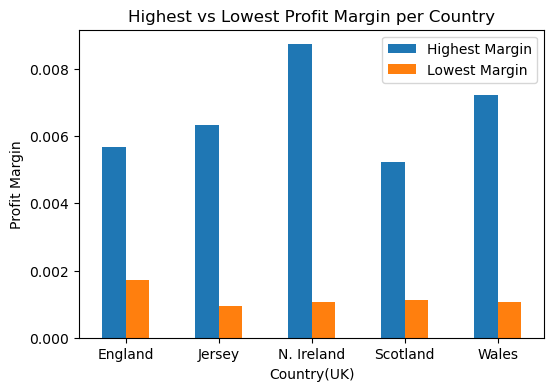

In [31]:

# Highest and lowest margins already computed
highest_margin = margin_summary.loc[margin_summary.groupby('Country(UK)')['Profit Margin'].idxmax()]
lowest_margin = margin_summary.loc[margin_summary.groupby('Country(UK)')['Profit Margin'].idxmin()]
# Merge for plotting
margin_compare = highest_margin[['Country(UK)', 'Profit Margin']].merge(
    lowest_margin[['Country(UK)', 'Profit Margin']],
    on='Country(UK)',
    suffixes=('_Highest', '_Lowest')
)

# Plot grouped bar chart
margin_compare.plot(
    x='Country(UK)',
    y=['Profit Margin_Highest', 'Profit Margin_Lowest'],
    kind='bar',
    figsize=(6,4)
)
plt.title("Highest vs Lowest Profit Margin per Country")
plt.ylabel("Profit Margin")
plt.xticks(rotation=0)
plt.legend(["Highest Margin", "Lowest Margin"])
plt.show()

In [32]:
# 9. Peak month per confectionary
df['Month'] = pd.to_datetime(df['Date']).dt.month
peak_months = df.groupby(['Confectionary', 'Month'])['Units Sold'].sum().reset_index()
peak_months = peak_months.loc[peak_months.groupby('Confectionary')['Units Sold'].idxmax()]
print("Peak Month per Confectionary:\n", peak_months)

Peak Month per Confectionary:
       Confectionary  Month  Units Sold
1           Biscuit      2     25672.0
19      Biscuit Nut      8     24308.0
26          Caramel      3     71040.0
42      Caramel Nut      7     19208.0
56      Caramel nut      9     21270.0
70   Choclate Chunk     11     26438.0
75  Chocolate Chunk      6      8204.0
88            Plain      8     23316.0


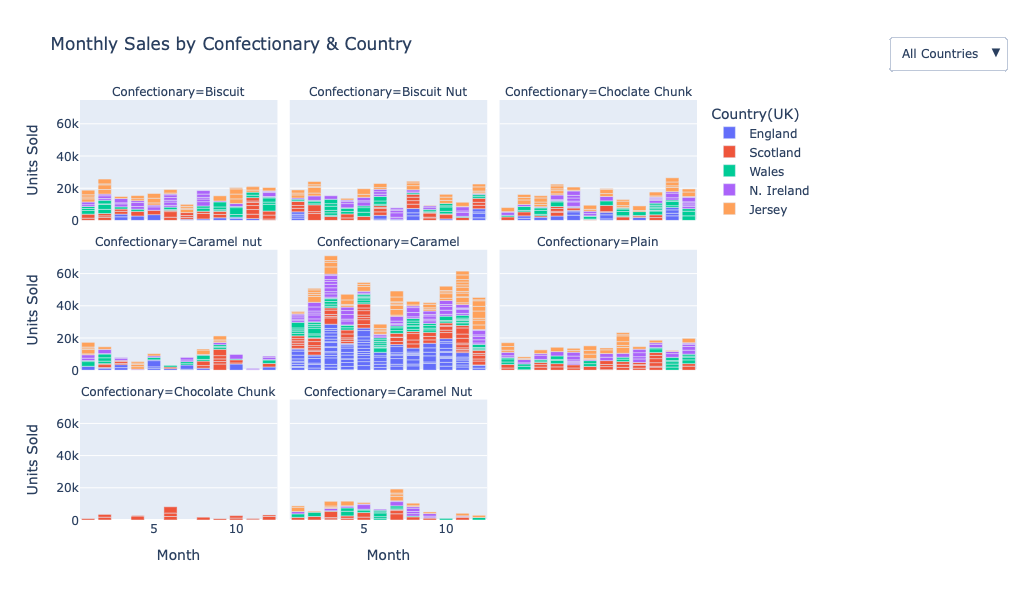

In [33]:

fig = px.bar(
    df,
    x="Month",
    y="Units Sold",
    color="Country(UK)",
    facet_col="Confectionary",
    facet_col_wrap=3,   # ✅ Wrap after 3 charts to avoid overlap
    title="Monthly Sales by Confectionary & Country"
)

# Rotate facet labels to avoid overlap
for annotation in fig.layout.annotations:
    annotation.textangle = 0

# Increase figure size for clarity
fig.update_layout(
    height=600,
    width=900,
    margin=dict(t=100),
    font=dict(size=12),
    updatemenus=[{
        "buttons": [
            {"method": "update", "label": "All Countries",
             "args": [{"visible": [True]*len(fig.data)}]},
            {"method": "update", "label": "England",
             "args": [{"visible": [trace.name == "England" for trace in fig.data]}]},
            {"method": "update", "label": "Scotland",
             "args": [{"visible": [trace.name == "Scotland" for trace in fig.data]}]},
            {"method": "update", "label": "Wales",
             "args": [{"visible": [trace.name == "Wales" for trace in fig.data]}]},
            {"method": "update", "label": "N. Ireland",
             "args": [{"visible": [trace.name == " N. Ireland" for trace in fig.data]}]},
            {"method": "update", "label": "Jersey",
             "args": [{"visible": [trace.name == "Jersey" for trace in fig.data]}]},
        ],
        "direction": "down",
        "x": 1.5,
        "y": 1.15,
        "showactive": True
    }]
)

fig.show()

In [34]:
# 11. Dashboard KPIs
total_revenue = df['Revenue(£)'].sum()
total_profit = df['Profit(£)'].sum()
avg_margin = df['Profit Margin'].mean()
peak_month_overall = df.groupby('Month')['Units Sold'].sum().idxmax()

print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Total Profit: £{total_profit:,.2f}")
print(f"Average Profit Margin: {avg_margin:.2%}")
print(f"Peak Month Overall: {peak_month_overall}")

Total Revenue: £2,521,968,763.65
Total Profit: £4,004,051.90
Average Profit Margin: 0.34%
Peak Month Overall: 3


In [35]:


# Initialize app
app = dash.Dash(__name__)
server = app.server

# Layout
app.layout = html.Div([
    html.H1("🍬 British Confectionary Dashboard", style={
    'textAlign': 'center',
    'color': '#1a1a1a',
    'fontFamily': 'Georgia, serif',
    'fontSize': '46px',
    'fontWeight': 'bold',
    'letterSpacing': '1px',
    'paddingTop': '25px',
    'paddingBottom': '15px',
    'textShadow': '2px 2px 6px #aaa',
    'borderBottom': '4px solid #e67e22',
    'marginBottom': '30px'
}),

    html.Div([
        html.Div([
            html.Label("Select Region", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='region-dropdown',
                options=[{'label': r, 'value': r} for r in sorted(df['Country(UK)'].unique())],
                value='England'
            ),
            html.Br(),
            html.Label("Select Year", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': y, 'value': y} for y in sorted(df['Date'].dt.year.unique())],
                value=2020
            )
        ], style={'width': '70%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px'}),

        html.Div([
            html.Label("Select Products", style={'fontWeight': 'bold'}),
            dcc.Checklist(
                id='product-checklist',
                options=[{'label': p, 'value': p} for p in sorted(df['Confectionary'].unique())],
                value=sorted(df['Confectionary'].unique()),
                style={'display': 'flex', 'flexDirection': 'column'}
            )
        ], style={'width': '28%', 'display': 'inline-block', 'verticalAlign': 'top',
                  'padding': '20px', 'backgroundColor': '#f9f9f9', 'borderRadius': '10px'})
    ], style={'display': 'flex', 'justifyContent': 'space-between'}),

    html.Div(id='kpi-block', style={
        'display': 'flex',
        'justifyContent': 'space-around',
        'padding': '20px',
        'marginBottom': '30px'
    }),

    html.Div([
        html.Div([
            dcc.Graph(id='sales-trend')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingRight': '2%'}),

        html.Div([
            dcc.Graph(id='bubble-chart')
        ], style={'width': '48%', 'display': 'inline-block'})
    ])
])

# Callback
@app.callback(
    [Output('kpi-block', 'children'),
     Output('sales-trend', 'figure'),
     Output('bubble-chart', 'figure')],
    [Input('region-dropdown', 'value'),
     Input('year-dropdown', 'value'),
     Input('product-checklist', 'value')]
)
def update_dashboard(region, year, products):
    filtered = df[
        (df['Country(UK)'] == region) &
        (df['Date'].dt.year == year) &
        (df['Confectionary'].isin(products))
    ]

    total_revenue = filtered['Revenue(£)'].sum()
    total_profit = filtered['Profit(£)'].sum()
    avg_margin = filtered['Profit Margin'].mean()
    units_sold = filtered['Units Sold'].sum()

    def kpi_card(title, value, bg_color, text_color):
        return html.Div([
            html.H4(title, style={'marginBottom': '5px', 'color': text_color}),
            html.H2(value, style={'color': text_color})
        ], style={
            'textAlign': 'center',
            'width': '22%',
            'padding': '15px',
            'backgroundColor': bg_color,
            'borderRadius': '10px',
            'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
        })

    kpi_display = [
        kpi_card("Total Revenue (£)", f"£{total_revenue:,.0f}", '#dff0d8', '#27ae60'),
        kpi_card("Total Profit (£)", f"£{total_profit:,.0f}", '#d9edf7', '#2980b9'),
        kpi_card("Avg Margin (%)", f"{avg_margin:.2%}", '#f5eaf7', '#8e44ad'),
        kpi_card("Units Sold", f"{units_sold:,}", '#faebd7', '#e67e22')
    ]

    # Line chart for monthly sales trend
    sales_trend = px.line(
        filtered.groupby('Month')['Units Sold'].sum().reset_index(),
        x='Month',
        y='Units Sold',
        title=f"Monthly Sales Trend ({region}, {year})",
        markers=True,
        template='plotly_white'
    )

    # Bubble chart for revenue vs profit margin
    bubble_chart = px.scatter(
        filtered,
        x='Revenue(£)',
        y='Profit Margin',
        size='Units Sold',
        color='Confectionary',
        hover_name='Confectionary',
        title="Revenue vs Profit Margin (Bubble Size = Units Sold)",
        template='plotly_white',
        size_max=60
    )

    return kpi_display, sales_trend, bubble_chart

# Run app
if __name__ == '__main__':
    app.run(debug=True)